In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### --Uploading data--

##### train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
##### PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
##### HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
##### CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
##### Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
##### Destination - The planet the passenger will be debarking to.
##### Age - The age of the passenger.
##### VIP - Whether the passenger has paid for special VIP service during the voyage.
##### RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
##### Name - The first and last names of the passenger.
##### Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
##### test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
##### sample_submission.csv - A submission file in the correct format.
##### PassengerId - Id for each passenger in the test set.
##### Transported - The target. For each passenger, predict either True or False.

In [19]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [20]:
X = train.drop("Transported", axis=1)   
y = train["Transported"].astype(int) 

### ---Exploratory Data Analysis---

In [21]:
print(train.shape)
train.head()

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


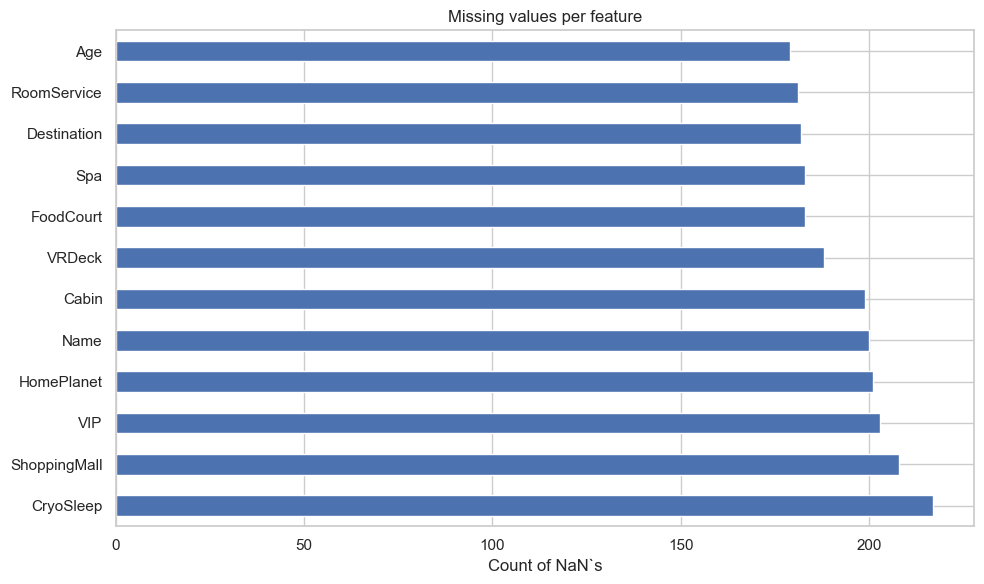

In [29]:
missing = train.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing.plot(kind='barh', title="Missing values per feature")
plt.xlabel("Count of NaN`s")
plt.tight_layout()
plt.show()

In [23]:
train.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [24]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
target = 'Transported'

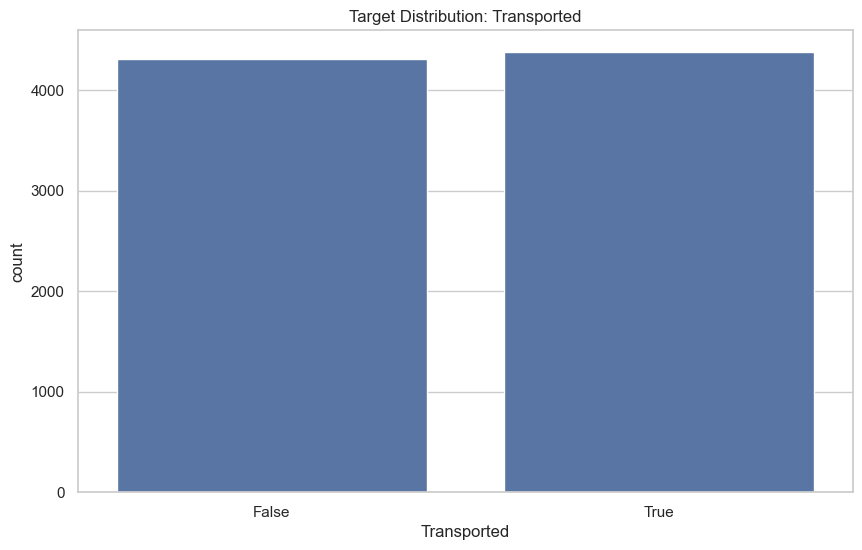

Transported
True     0.503624
False    0.496376
Name: proportion, dtype: float64


In [31]:
sns.countplot(x='Transported', data=train)
plt.title("Target Distribution: Transported")
plt.show()

print(train["Transported"].value_counts(normalize=True))

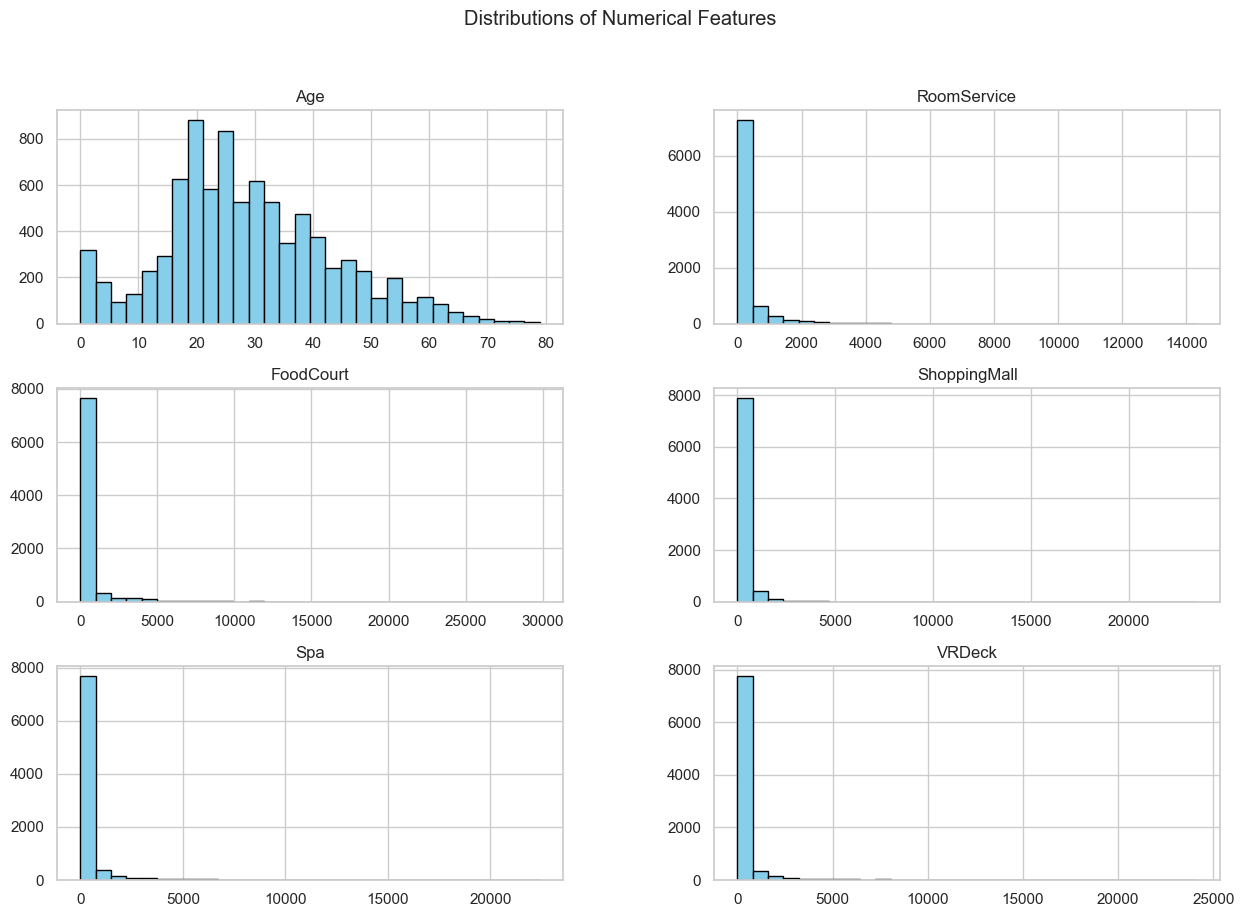

In [33]:
train[numerical_cols].hist(bins=30, figsize=(15, 10), color="skyblue", edgecolor="black")
plt.suptitle("Distributions of Numerical Features")
plt.show()

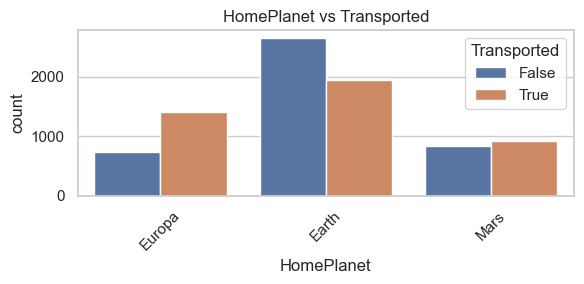

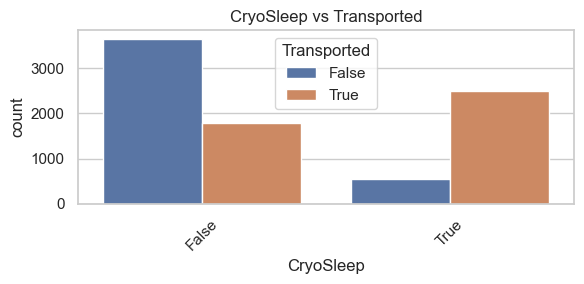

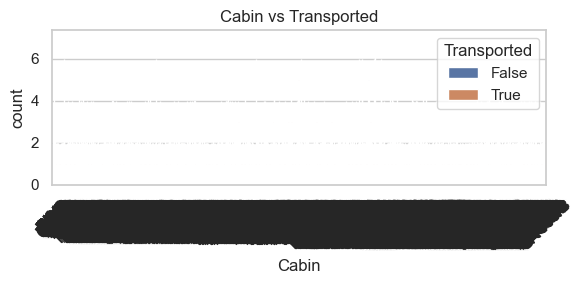

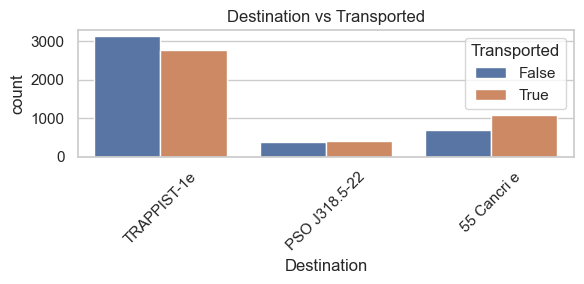

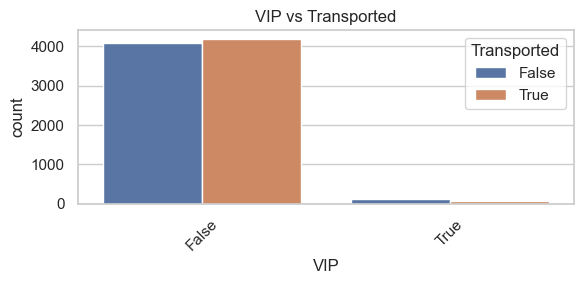

In [34]:
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='Transported', data=train)
    plt.title(f"{col} vs Transported")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [35]:
cabin_split = train['Cabin'].str.split('/', expand=True)
cabin_split.columns = ['Deck', 'CabinNum', 'Side']

train = pd.concat([train, cabin_split], axis=1)

train['CabinNum'] = pd.to_numeric(train['CabinNum'], errors='coerce')


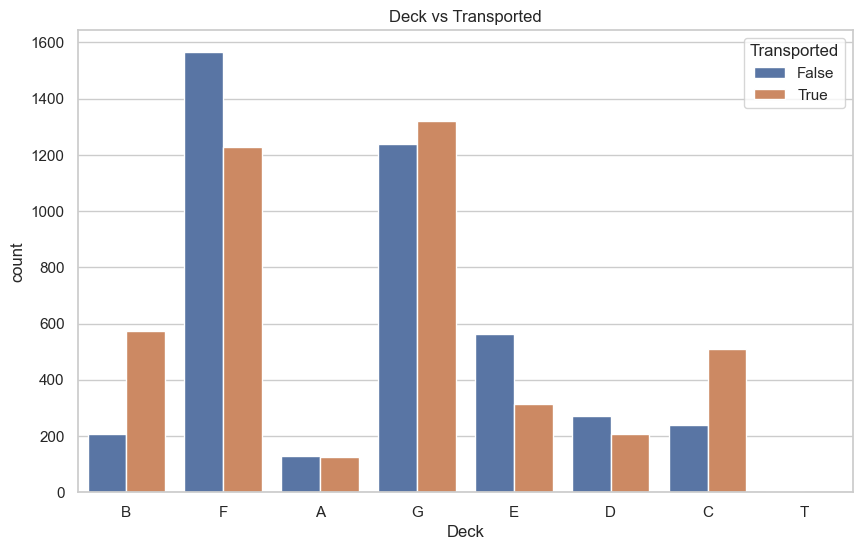

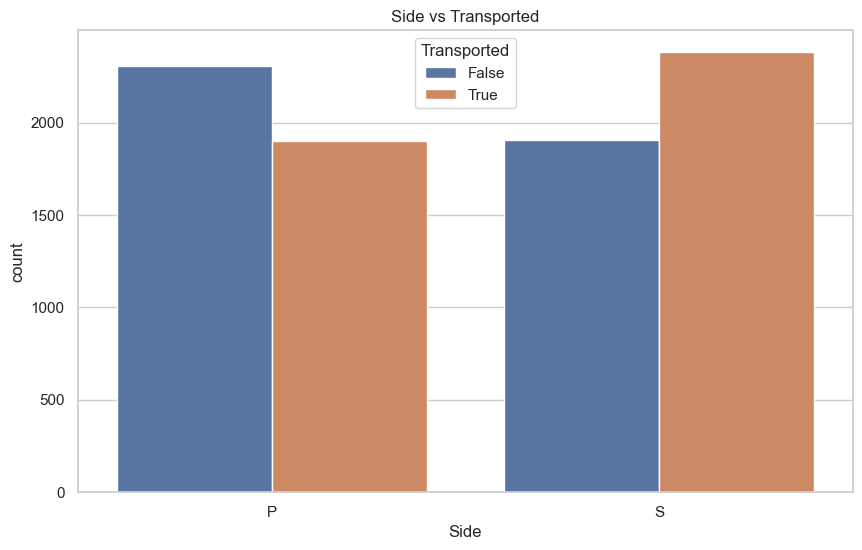

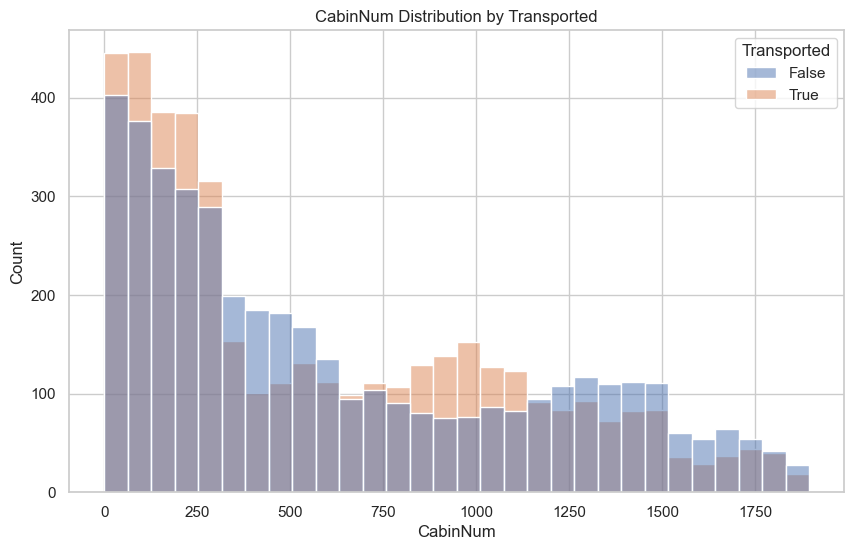

In [36]:
sns.countplot(data=train, x='Deck', hue='Transported')
plt.title("Deck vs Transported")
plt.show()

sns.countplot(data=train, x='Side', hue='Transported')
plt.title("Side vs Transported")
plt.show()

sns.histplot(data=train, x='CabinNum', hue='Transported', bins=30)
plt.title("CabinNum Distribution by Transported")
plt.show()


### ---Encoding new features---

In [38]:
train['CabinMissing'] = train['Cabin'].isna()

In [54]:
bins = [0, 12, 30, 60, 100]
labels = ['Child', 'Young', 'Adult', 'Aged']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

In [41]:
train['TotalSpent'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']

In [43]:
train['IsEarth'] = (train['HomePlanet'] == 'Earth').astype(int)

In [77]:
train['Deck'] = train['Cabin'].str.split('/').str[0]

train['LowDeck'] = train['Deck'].isin(['G', 'F']).astype(int)
train['MidDeck'] = train['Deck'].isin(['E', 'D']).astype(int)
train['HighDeck'] = train['Deck'].isin(['A', 'B', 'C']).astype(int)


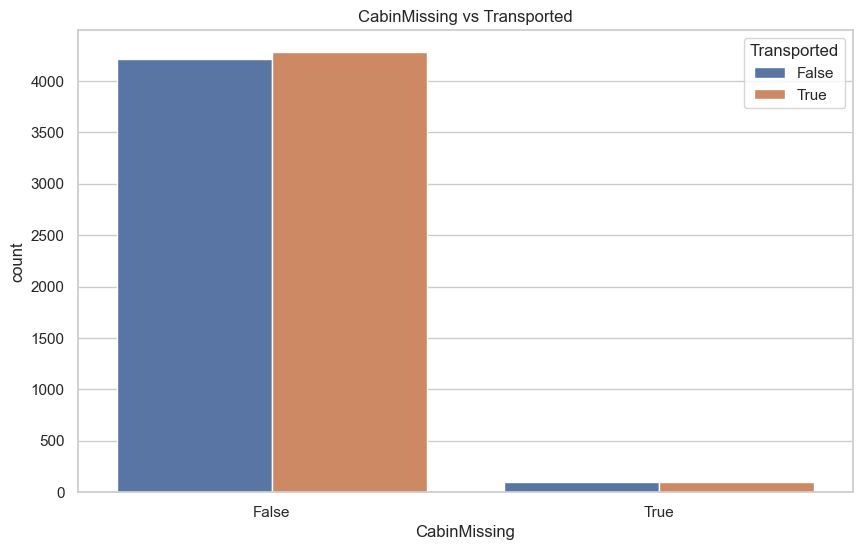

Percentage of missing values in Cabin: 2.29%


In [50]:
sns.countplot(data=train, x='CabinMissing', hue='Transported')
plt.title("CabinMissing vs Transported")
plt.show()
print(f"Percentage of missing values in Cabin: {train['CabinMissing'].mean() * 100:.2f}%")

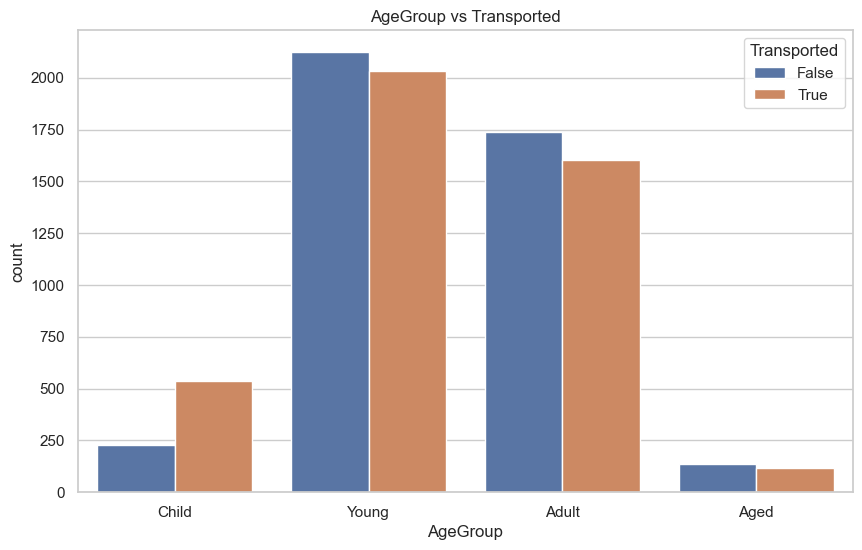

Distribution of age groups:
AgeGroup
Young    48.801973
Adult    39.229504
Child     8.985201
Aged      2.983322
Name: proportion, dtype: float64


In [58]:
sns.countplot(data=train, x='AgeGroup', hue='Transported')
plt.title("AgeGroup vs Transported")
plt.show()
age_group_dist = train['AgeGroup'].value_counts(normalize=True) * 100
print(f"Distribution of age groups:\n{age_group_dist}")

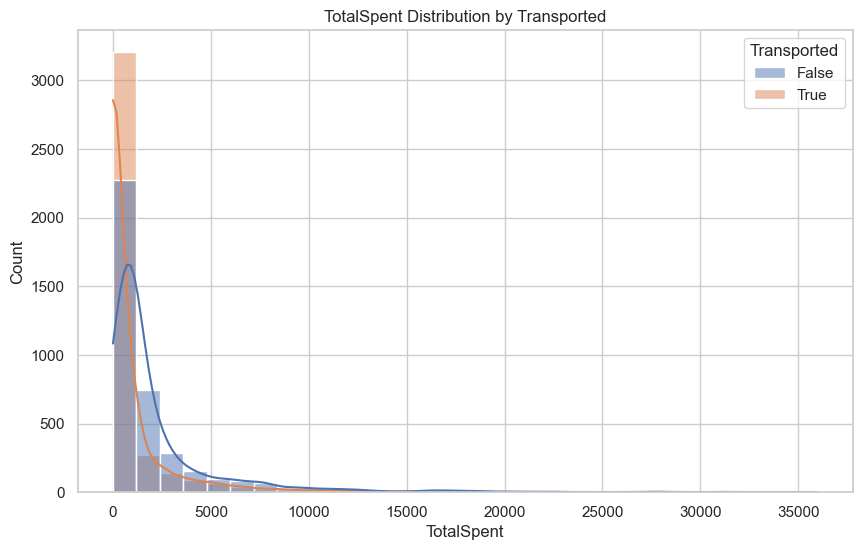

Average expenses by category Transported:
Transported
False    2049.820553
True      925.017382
Name: TotalSpent, dtype: float64


In [61]:
sns.histplot(data=train, x='TotalSpent', hue='Transported', kde=True, bins=30)
plt.title("TotalSpent Distribution by Transported")
plt.show()

total_spent_by_transport = train.groupby('Transported')['TotalSpent'].mean()
print(f"Average expenses by category Transported:\n{total_spent_by_transport}")

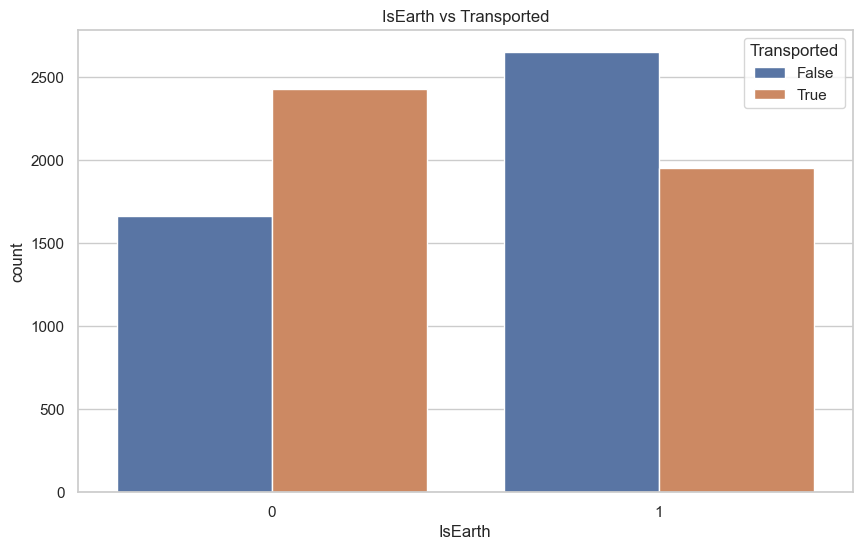

Процент пассажиров с Земли: 52.94%


In [63]:
sns.countplot(data=train, x='IsEarth', hue='Transported')
plt.title("IsEarth vs Transported")
plt.show()

earth_pct = train['IsEarth'].mean() * 100
print(f"Percentage of passengers from Earth: {earth_pct:.2f}%")


In [314]:
print(train['Cabin'].unique())


['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']


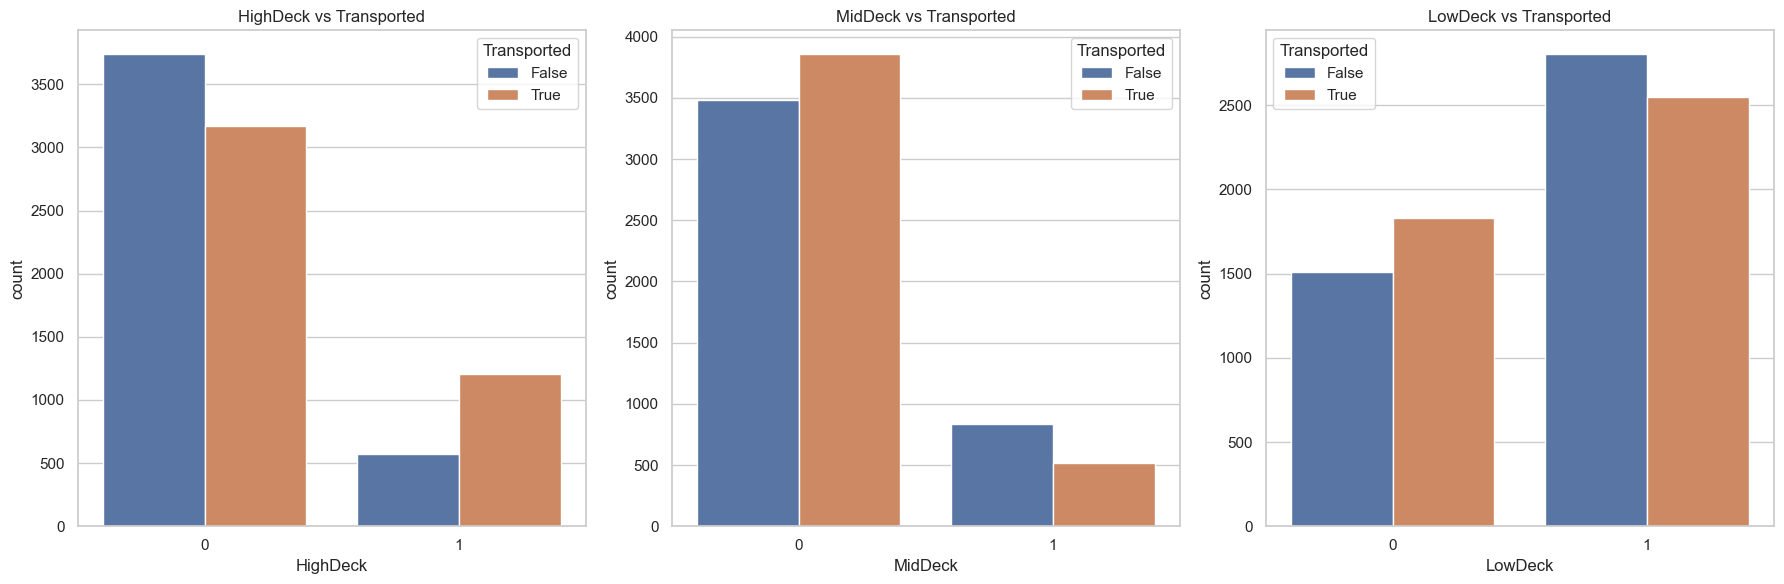

Percentage of passengers on high decks: 20.50%
Percentage of passengers on mid decks: 15.58%
Percentage of passengers on low decks: 61.58%


In [78]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(data=train, x='HighDeck', hue='Transported', ax=axes[0])
axes[0].set_title("HighDeck vs Transported")

sns.countplot(data=train, x='MidDeck', hue='Transported', ax=axes[1])
axes[1].set_title("MidDeck vs Transported")

sns.countplot(data=train, x='LowDeck', hue='Transported', ax=axes[2])
axes[2].set_title("LowDeck vs Transported")

plt.tight_layout()
plt.show()

high_deck_pct = train['HighDeck'].mean() * 100
mid_deck_pct = train['MidDeck'].mean() * 100
low_deck_pct = train['LowDeck'].mean() * 100

print(f"Percentage of passengers on high decks: {high_deck_pct:.2f}%")
print(f"Percentage of passengers on mid decks: {mid_deck_pct:.2f}%")
print(f"Percentage of passengers on low decks: {low_deck_pct:.2f}%")

In [79]:
train.groupby('HighDeck')['Transported'].mean()
train.groupby('MidDeck')['Transported'].mean()
train.groupby('LowDeck')['Transported'].mean()


LowDeck
0    0.547305
1    0.476368
Name: Transported, dtype: float64

#### ---Pass processing---

In [137]:
print(X.columns)


Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'CabinNum', 'CabinMissing', 'TotalSpent', 'NoSpending',
       'IsEarth', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S', 'AgeGroup_Child', 'AgeGroup_Young',
       'AgeGroup_Adult', 'AgeGroup_Aged', 'HighDeck', 'LowDeck', 'MidDeck'],
      dtype='object')


In [245]:
X['TotalSpent'] = X['TotalSpent'].fillna(0)
X['ShoppingMall'] = X['ShoppingMall'].fillna(0)



#### Passengers not on the lower decks (LowDeck=0) had a higher chance of being transported.
#### And those who lived on decks F and G (LowDeck=1), on the contrary, have a lower chance of transportation.

### ---We are working---

In [290]:
import shap
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [291]:
X = train.drop(columns=['Deck','AgeGroup', 'Cabin', 'VIP', 'Name', 'PassengerId'])
y = train['Transported']

In [292]:
categorical_cols = ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 
                    'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
                    'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 
                    'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
                    'Side_P', 'Side_S', 'AgeGroup_Child', 'AgeGroup_Young', 'AgeGroup_Adult', 'AgeGroup_Aged', 
                    'HighDeck', 'LowDeck', 'MidDeck', 'CabinMissing']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']

In [293]:
print(X.columns)


Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'CabinNum', 'CabinMissing', 'TotalSpent', 'NoSpending',
       'IsEarth', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S', 'AgeGroup_Child', 'AgeGroup_Young',
       'AgeGroup_Adult', 'AgeGroup_Aged', 'HighDeck', 'LowDeck', 'MidDeck'],
      dtype='object')


In [294]:
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 
])

In [295]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [296]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', 'passthrough', categorical_cols)  
    ]
)

In [297]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(random_state=42))
])

In [298]:
# grid_search = GridSearchCV(
#     model,
#     param_grid = {
#     'classifier__num_leaves': [10, 20, 31, 40, 50],
#     'classifier__learning_rate': [0.01, 0.03, 0.05, 0.1],
#     'classifier__colsample_bytree': [0.6, 0.8],
#     'classifier__n_estimators': [50,100,150, 200, 250],
# },
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=2
# )


In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [300]:
# grid_search.fit(X_train, y_train)

In [301]:
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3283, number of negative: 3236
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1659
[LightGBM] [Info] Number of data points in the train set: 6519, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,503605 -> initscore=0,014420
[LightGBM] [Info] Start training from score 0,014420


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck',
                                                   'TotalSpent']),
                                                 ('cat', 'passthrough',
                                                  ['HomePlanet_Earth',
                                                   'HomePlanet_Europa',
                                                   'HomePlanet_Mars',
                                                   'CryoSleep_False',
                                                   'CryoSleep_True',
                                                   'Destination_55 Cancri e',
                                                   'Destination_PSO J318.5-22',
                                                   'Destination_TRAPPIST-1e',
                                                   'Deck_A', 'Deck_B', 'Deck_C',
                                                   'Deck_D', 'Deck_E', 'Deck_F',
                                                   'Deck_G', 'Deck_T', 'Side_P',
                                                   'Side_S', 'AgeGroup_Child',
                                                   'AgeGroup_Young',
                                                   'AgeGroup_Adult',
                                                   'AgeGroup_Aged', 'HighDeck',
                                                   'LowDeck', 'MidDeck',
                                                   'CabinMissing'])])),
                ('classifier', LGBMClassifier(random_state=42))])

In [302]:
X_train_transformed = model.named_steps['preprocessor'].transform(X_train)

In [303]:
explainer = shap.TreeExplainer(model.named_steps['classifier'])
shap_values = explainer.shap_values(X_train_transformed)

c:\Users\USER\Documents\vs_code\pyt_proj\.venv\lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


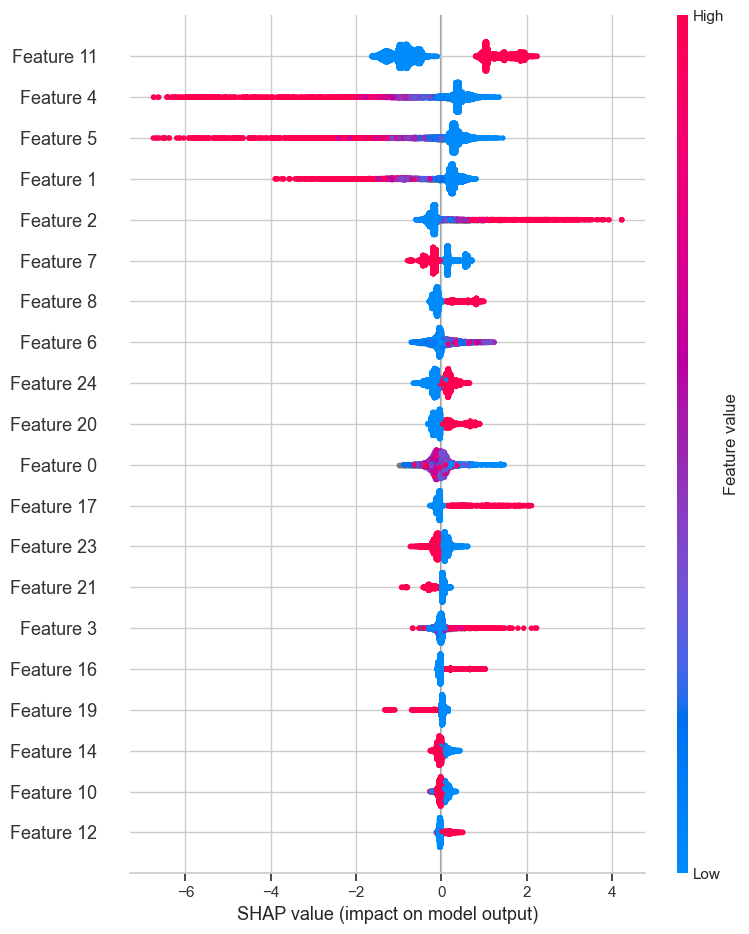

In [304]:
shap.summary_plot(shap_values, X_train_transformed)

In [305]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.8839
Test Accuracy: 0.8091


c:\Users\USER\Documents\vs_code\pyt_proj\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\Documents\vs_code\pyt_proj\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
